In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('dataset.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [7]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [5]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [8]:
data.shape

(11504798, 12)

In [9]:
import seaborn as sb

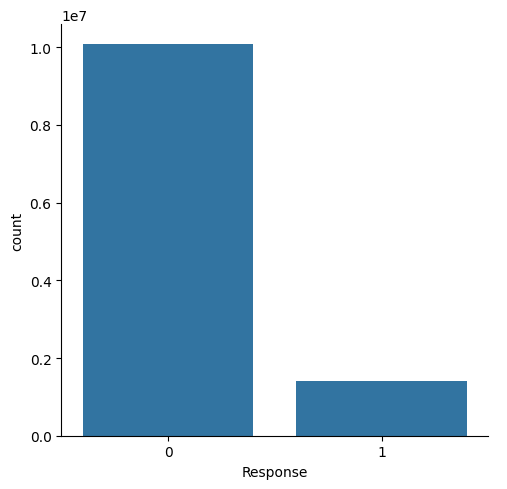

In [10]:
sb.catplot(x='Response',data=data,kind='count')

In [12]:
count_of_response=data['Response'].value_counts()
print(count_of_response)

Response
0    10089739
1     1415059
Name: count, dtype: int64


# the dataset is found to be imbalanced (we can also see the analysis from the bar chart), the dependent variable's category records should be balanced. only then we'll get an unbiased result . or else the result will be biased. on our case the "Response" type 0 is nearly 10 times greater than the "Response" type 1. so it is clearly imbalanced. We have to create a balanced dataset

# and also i'll take total of 40000 records with balanced records from both category. because it will be faster and easier to analyse and train.


Creating a Balanced Dataset

In [14]:
response_type_1_data=data[data['Response']==1]
response_type_0_data=data[data['Response']==0]


new_response_type_0_data=response_type_0_data.sample(n=20000,random_state=42)
new_response_type_1_data=response_type_1_data.sample(n=20000,random_state=42)

new_data=pd.concat([new_response_type_0_data,new_response_type_1_data],axis=0)

print(new_data.shape)

(40000, 12)


In [15]:
print(new_response_type_0_data.shape)
print(new_response_type_1_data.shape)

(20000, 12)
(20000, 12)


In [16]:
print(new_data.describe())

                 id           Age  Driving_License   Region_Code  \
count  4.000000e+04  40000.000000     40000.000000  40000.000000   
mean   5.736632e+06     40.524700         0.998550     26.654100   
std    3.330996e+06     13.839465         0.038052     12.277649   
min    5.600000e+02     20.000000         0.000000      0.000000   
25%    2.860676e+06     27.000000         1.000000     18.000000   
50%    5.741592e+06     41.000000         1.000000     28.000000   
75%    8.621320e+06     50.000000         1.000000     33.000000   
max    1.150478e+07     83.000000         1.000000     52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel       Vintage  \
count        40000.000000    40000.000000          40000.000000  40000.000000   
mean             0.267525    31076.825150            102.806575    162.465225   
std              0.442674    17088.307494             55.898988     79.653641   
min              0.000000     2630.000000              1.000000

Analysing the Distribution and Correlation